# Stroke Outcome Package Demo

`pip install stroke-outcome` if necessary.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stroke_outcome.continuous_outcome import Continuous_outcome

## Load example patients

The model needs the following data as inputs, with one value per patient in each array:

| Data | Units | Data type | Name |
| --- | --- | --- | --- |
| Stroke type code | 0=other, 1=nLVO, 2=LVO | int | `stroke_type_code` |
| Onset to needle time | minutes | float | `onset_to_needle_mins` |
| Whether IVT was chosen | 1=True, 0=False | int or bool | `ivt_chosen_bool` |
| Onset to puncture time | minutes | float | `onset_to_puncture_mins` |
| Whether MT was chosen | 1=True, 0=False | int or bool | `mt_chosen_bool` |

In [2]:
patients = pd.read_csv('example_patients.csv')
patients

,stroke_type_code,onset_to_needle_mins,ivt_chosen_bool,onset_to_puncture_mins,mt_chosen_bool
0,1,0,0,0,0
1,1,0,1,0,0
2,1,378,1,0,0
3,2,0,0,0,0
4,2,0,1,0,0
5,2,378,1,0,0
6,2,0,0,0,1
7,2,0,0,480,1
8,2,0,1,0,1
9,2,378,1,480,1


In [3]:
# Set up outcome model
continuous_outcome = Continuous_outcome()
# Assign patients to trial
continuous_outcome.assign_patients_to_trial(patients)
# Calculate outcomes
patient_data_dict, full_patient_breakdown , patient_outcomes = (
    continuous_outcome.calculate_outcomes())

In [4]:
patient_outcomes

{'each_patient_mrs_dist_post_stroke': array([[0.198     , 0.46      , 0.58      , 0.708     , 0.856     ,
         0.918     , 1.        ],
        [0.445     , 0.642     , 0.752     , 0.862     , 0.941     ,
         0.967     , 1.        ],
        [0.196     , 0.455     , 0.574     , 0.701     , 0.847     ,
         0.908     , 1.        ],
        [0.05      , 0.129     , 0.265     , 0.429     , 0.676     ,
         0.811     , 1.        ],
        [0.14      , 0.233     , 0.361     , 0.522     , 0.73      ,
         0.838     , 1.        ],
        [0.048     , 0.124     , 0.255     , 0.414     , 0.653     ,
         0.783     , 1.        ],
        [0.306     , 0.429     , 0.548     , 0.707     , 0.851     ,
         0.915     , 1.        ],
        [0.048     , 0.124     , 0.255     , 0.412     , 0.649     ,
         0.779     , 1.        ],
        [0.306     , 0.429     , 0.548     , 0.707     , 0.851     ,
         0.915     , 1.        ],
        [0.048     , 0.124     , 0.2

In [5]:
patients['mrs_post_stroke'] = patient_outcomes['each_patient_mrs_post_stroke'].round(3)
patients['mrs_shift'] = patient_outcomes['each_patient_mrs_shift'].round(3)
patients['utility'] = patient_outcomes['each_patient_utility_post_stroke'].round(3)
patients['utility_shift'] = patient_outcomes['each_patient_utility_shift'].round(3)

patients


,stroke_type_code,onset_to_needle_mins,ivt_chosen_bool,onset_to_puncture_mins,mt_chosen_bool,mrs_post_stroke,mrs_shift,utility,utility_shift
0,1,0,0,0,0,2.280,0.000,0.600,0.000
1,1,0,1,0,0,1.391,-0.889,0.758,0.158
2,1,378,1,0,0,2.319,0.039,0.594,-0.006
3,2,0,0,0,0,3.640,0.000,0.333,0.000
4,2,0,1,0,0,3.176,-0.464,0.422,0.089
5,2,378,1,0,0,3.723,0.083,0.321,-0.012
6,2,0,0,0,1,2.244,-1.396,0.597,0.265
7,2,0,0,480,1,3.733,0.093,0.319,-0.013
8,2,0,1,0,1,2.244,-1.396,0.597,0.265
9,2,378,1,480,1,3.723,0.083,0.321,-0.012


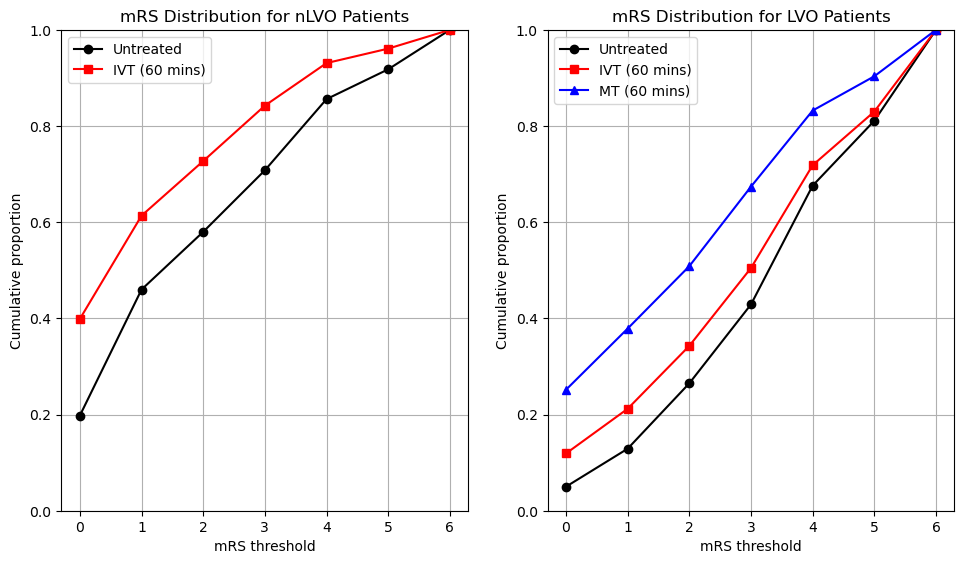

In [6]:
fig = plt.figure(figsize=(10, 6))
x = np.arange(0, 6.1)

# nLVO
ax1 = fig.add_subplot(121)
ax1.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][0],
           c='k',
           marker='o',
           label='Untreated')
ax1.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][10],
           c='r',
           marker='s',
           label='IVT (60 mins)')
ax1.set_ylim(0, 1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('mRS threshold')
ax1.set_ylabel('Cumulative proportion')
ax1.set_title('mRS Distribution for nLVO Patients')


# LVO
ax2 = fig.add_subplot(122)
ax2.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][3],
           c='k',
           marker='o',
           label='Untreated')
ax2.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][11],
           c='r',
           marker='s',
           label='IVT (60 mins)')
ax2.plot(x, patient_outcomes['each_patient_mrs_dist_post_stroke'][12],
           c='b',
           marker='^',
           label='MT (60 mins)')
ax2.set_xlabel('mRS threshold')
ax2.set_ylabel('Cumulative proportion')
ax2.set_ylim(0, 1)
ax2.legend()
ax2.set_title('mRS Distribution for LVO Patients')
ax2.legend()
ax2.grid()

plt.tight_layout(pad=2)
plt.savefig('mrs_dist.jpg', dpi=300)
plt.show()